# Movies Analysis

## Part 1: Lights, Camera, Data!

### Scene 1: Setting Up the Story

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
merge1 = pd.merge(movies,tags,on=['movieId'])

In [8]:
merge1.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,animation,1422605756
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,friendship,1422605756
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,toys,1422605756
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,animation,1147410824
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,Disney,1147449942


In [9]:
merge1.shape

(2328315, 6)

In [10]:
merge2 = pd.merge(merge1,ratings,on=['movieId','userId'])

In [11]:
merge2.head()

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,animation,1422605756,2.5,1666296133
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,friendship,1422605756,2.5,1666296133
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,toys,1422605756,2.5,1666296133
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,animation,1147410824,4.0,1147410827
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,Disney,1147449942,4.0,1147410827


In [12]:
merge2.shape

(1729292, 8)

In [13]:
merge3 = pd.merge(merge2,links,on='movieId')

In [14]:
merge3.head()

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,animation,1422605756,2.5,1666296133,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,friendship,1422605756,2.5,1666296133,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,toys,1422605756,2.5,1666296133,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,animation,1147410824,4.0,1147410827,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,Disney,1147449942,4.0,1147410827,114709,862.0


In [15]:
merge3.shape

(1729292, 10)

### Scene 2: The Final Take

In [16]:
merge3.to_csv('Movies_Final.csv', index=False)

## Part 2: Decoding the Plot

### Scene 3: Unveiling the Source - The Grandfather

https://grouplens.org/datasets/movielens/latest/

##### Formatting and Encoding
The dataset files are written as comma-separated values files with a single header row. Columns that contain commas (,) are escaped using double-quotes ("). These files are encoded as UTF-8. If accented characters in movie titles or tag values (e.g. Misérables, Les (1995)) display incorrectly, make sure that any program reading the data, such as a text editor, terminal, or script, is configured for UTF-8.

##### User Ids
MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).

##### Movie Ids
Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

##### Ratings Data File Structure (ratings.csv)
All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

###### userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

##### Tags Data File Structure (tags.csv)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

##### userId,movieId,tag,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

##### Movies Data File Structure (movies.csv)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

##### movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

##### Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

##### Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

##### movieId,imdbId,tmdbId
movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

### Scene 4: The Plot Twist - Problem Statement

##### Act 1 : Setting the Stage 
"Investigate and analyze the MovieLens dataset to uncover meaningful insights and patterns in user ratings and tags, with the objective of understanding user preferences and movie characteristics."

##### Act 2 : Unveiling the Mystery
"Utilize statistical methods and machine learning techniques to predict movie ratings and recommend personalized movie choices based on user profiles."

##### Act 2 Returns : The Climax - Letting the Plot Unfold 
"Wait and allow the narrative to evolve naturally, adapting strategies as insights emerge, to optimize movie recommendations and enhance user satisfaction."

### Act 1 : Setting the Stage

In [17]:
df = pd.read_csv('movies_final.csv')

In [18]:
df.head()

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,animation,1422605756,2.5,1666296133,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,friendship,1422605756,2.5,1666296133,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499,toys,1422605756,2.5,1666296133,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,animation,1147410824,4.0,1147410827,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114,Disney,1147449942,4.0,1147410827,114709,862.0


In [19]:
df.shape

(1729292, 10)

In [20]:
df.isnull().sum()

movieId          0
title            0
genres           0
userId           0
tag              2
timestamp_x      0
rating           0
timestamp_y      0
imdbId           0
tmdbId         295
dtype: int64

In [21]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'tag', 'timestamp_x', 'rating',
       'timestamp_y', 'imdbId', 'tmdbId'],
      dtype='object')

In [22]:
df['timestamp_x'] = pd.to_datetime(df['timestamp_x'], unit='s')
df['timestamp_y'] = pd.to_datetime(df['timestamp_y'], unit='s')

##### Male Lead Role - 'TITLE'
##### Female Lead Role - 'RATING'
##### Male Supporting Role - 'GENRE'
###### Female Supporting Role - 'TAG'
##### other supporting roles - 'movieId','userId','timestamp_x', 'timestamp_y', 'imdbId', 'tmdbId'

#### Chapter 1 - Intro

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729292 entries, 0 to 1729291
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   movieId      int64         
 1   title        object        
 2   genres       object        
 3   userId       int64         
 4   tag          object        
 5   timestamp_x  datetime64[ns]
 6   rating       float64       
 7   timestamp_y  datetime64[ns]
 8   imdbId       int64         
 9   tmdbId       float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 131.9+ MB


In [24]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
movieId,1729292.0,68533.97817,1.0,3254.0,48774.0,112774.0,288955.0,74134.945897
userId,1729292.0,168388.177589,10.0,95107.0,184858.0,225061.0,330923.0,89915.117657
timestamp_x,1729292,2017-12-18 11:13:42.496511744,2005-12-24 13:00:10,2015-08-31 04:55:11.500000,2019-03-04 22:56:09.500000,2021-03-05 12:51:29.750000128,2023-07-20 08:12:30,NaN
rating,1729292.0,3.690682,0.5,3.0,4.0,4.5,5.0,1.107567
timestamp_y,1729292,2017-02-08 09:10:58.348215552,1997-09-15 21:13:53,2014-05-13 05:27:33.249999872,2018-03-01 06:43:54,2020-11-22 23:44:46,2023-07-20 08:12:47,NaN
imdbId,1729292.0,1495751.677317,3.0,113101.0,385700.0,1650062.0,27989067.0,2438896.973948
tmdbId,1728997.0,108346.821634,2.0,1272.0,12162.0,137113.0,1136736.0,176675.176098


In [25]:
df.describe(include=object).T

,count,unique,top,freq
title,1729292,30481,Inception (2010),8817
genres,1729292,1364,Drama,132736
tag,1729290,112830,sci-fi,13407


In [26]:
df.title.value_counts()

title
Inception (2010)                             8817
Pulp Fiction (1994)                          8574
Star Wars: Episode IV - A New Hope (1977)    7663
Matrix, The (1999)                           7372
Fight Club (1999)                            7210
                                             ... 
Love to the Rescue (2019)                       1
Newtown (2016)                                  1
The Cabin in the Cotton (1932)                  1
Rare and Unseen: The Beatles (2008)             1
Sheriff and the Satellite Kid, The (1979)       1
Name: count, Length: 30481, dtype: int64

In [27]:
df.title.mode()

0    Inception (2010)
Name: title, dtype: object

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
titles = df.groupby('rating')['title'].agg(list)

In [30]:
titles

rating
0.5    [Toy Story (1995), Toy Story (1995), Toy Story...
1.0    [Toy Story (1995), Toy Story (1995), Toy Story...
1.5    [Toy Story (1995), Toy Story (1995), Toy Story...
2.0    [Toy Story (1995), Toy Story (1995), Toy Story...
2.5    [Toy Story (1995), Toy Story (1995), Toy Story...
3.0    [Toy Story (1995), Toy Story (1995), Toy Story...
3.5    [Toy Story (1995), Toy Story (1995), Toy Story...
4.0    [Toy Story (1995), Toy Story (1995), Toy Story...
4.5    [Toy Story (1995), Toy Story (1995), Toy Story...
5.0    [Toy Story (1995), Toy Story (1995), Toy Story...
Name: title, dtype: object

C:\Users\mbkhn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


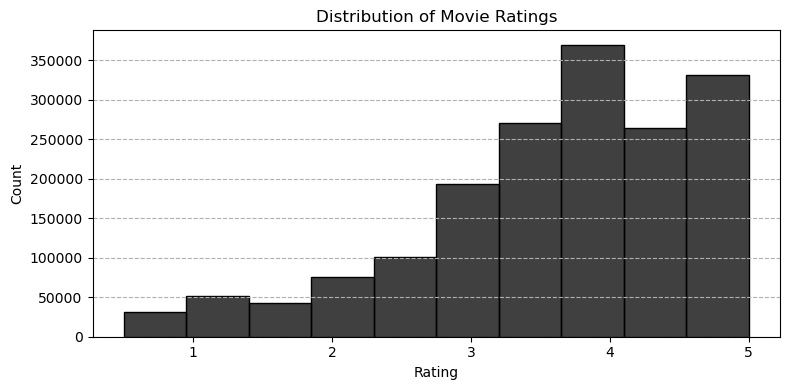

In [51]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='rating', bins=10, kde=False, color='black', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [32]:
df1 = df[['rating','movieId','userId','timestamp_x','timestamp_y','imdbId','tmdbId']]

In [33]:
corr_matrix = df1.corr()

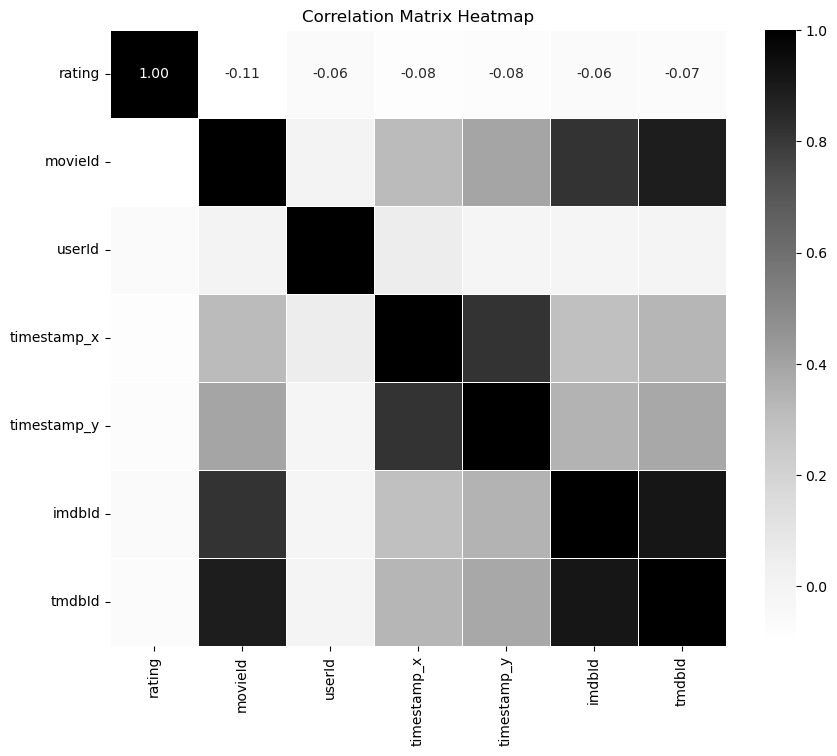

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greys', square=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
genre_avg_rating = df.groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_avg_rating

genres
Action|Crime|Romance                               5.0
Animation|Drama|Thriller                           5.0
Animation|Drama|Fantasy|War                        5.0
Drama|IMAX                                         5.0
Comedy|Crime|Fantasy                               5.0
                                                  ... 
Action|Adventure|Comedy|Horror|Sci-Fi              0.5
Action|Adventure|Comedy|Fantasy|Sci-Fi|Thriller    0.5
Action|Comedy|Romance|Sci-Fi                       0.5
Action|Adventure|Crime|Drama|Romance|Thriller      0.5
Children|Mystery                                   0.5
Name: rating, Length: 1364, dtype: float64

In [36]:
data = {
    'genres': genre_avg_rating.index[:10],
    'rating': genre_avg_rating.values[:10]
}

In [37]:
genre_avg_rating_df = pd.DataFrame(data)

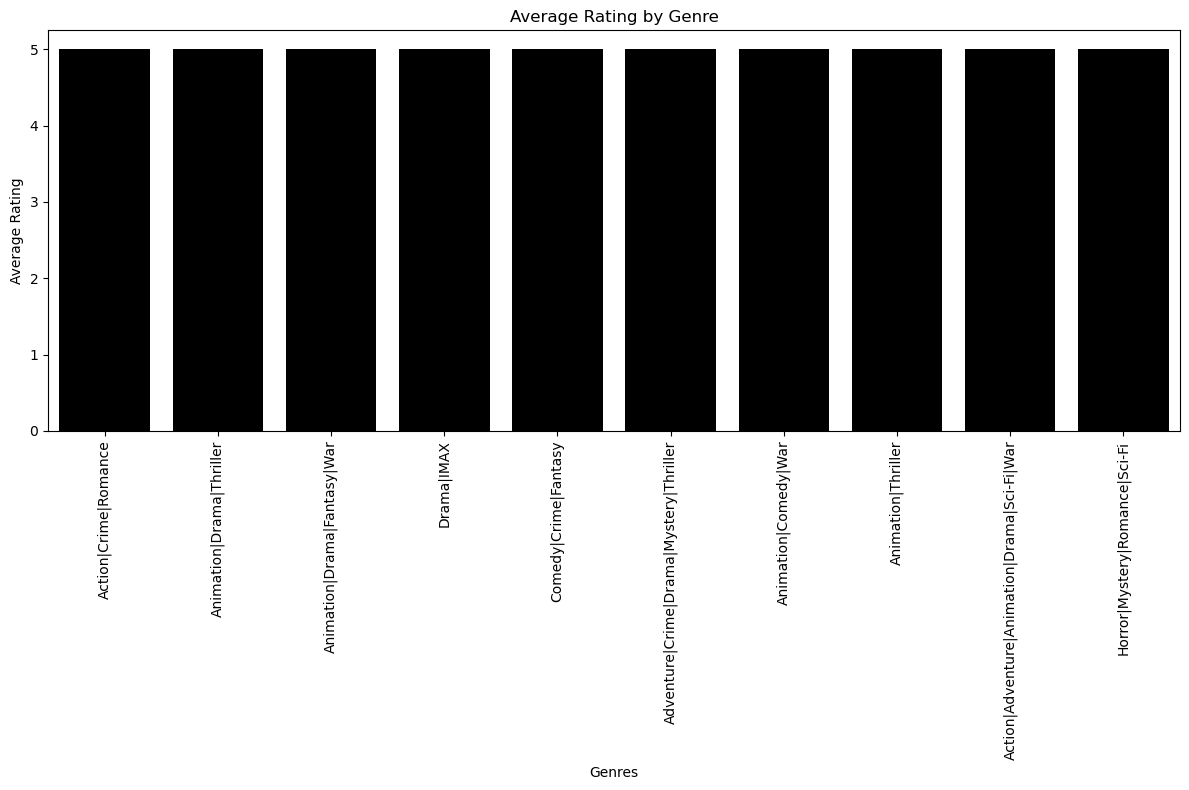

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_avg_rating_df, x='genres', y='rating', color='black')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.tight_layout()
plt.show()

In [39]:
title_avg_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False)
title_avg_rating

title
줄탁동시 (2012)                        5.0
Lula, the Son of Brazil (2010)     5.0
We Are Mountains (1969)            5.0
Boruto: Naruto the Movie (2015)    5.0
Le syndrome du Titanic (2009)      5.0
                                  ... 
Dysmorphia (2014)                  0.5
Neon Lights (2022)                 0.5
Death of a Nation (2018)           0.5
Louder Than Words (2013)           0.5
Surfers’ Time (2005)               0.5
Name: rating, Length: 30481, dtype: float64

In [40]:
data = {
    'title': title_avg_rating.index[:10],
    'rating': title_avg_rating.values[:10]
}

In [41]:
title_avg_rating_df = pd.DataFrame(data)

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_10340\2590870330.py:7: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from current font.
  plt.tight_layout()
C:\Users\mbkhn\AppData\Local\Temp\ipykernel_10340\2590870330.py:7: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from current font.
  plt.tight_layout()
C:\Users\mbkhn\AppData\Local\Temp\ipykernel_10340\2590870330.py:7: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
C:\Users\mbkhn\AppData\Local\Temp\ipykernel_10340\2590870330.py:7: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\mbkhn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mbkhn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from cu

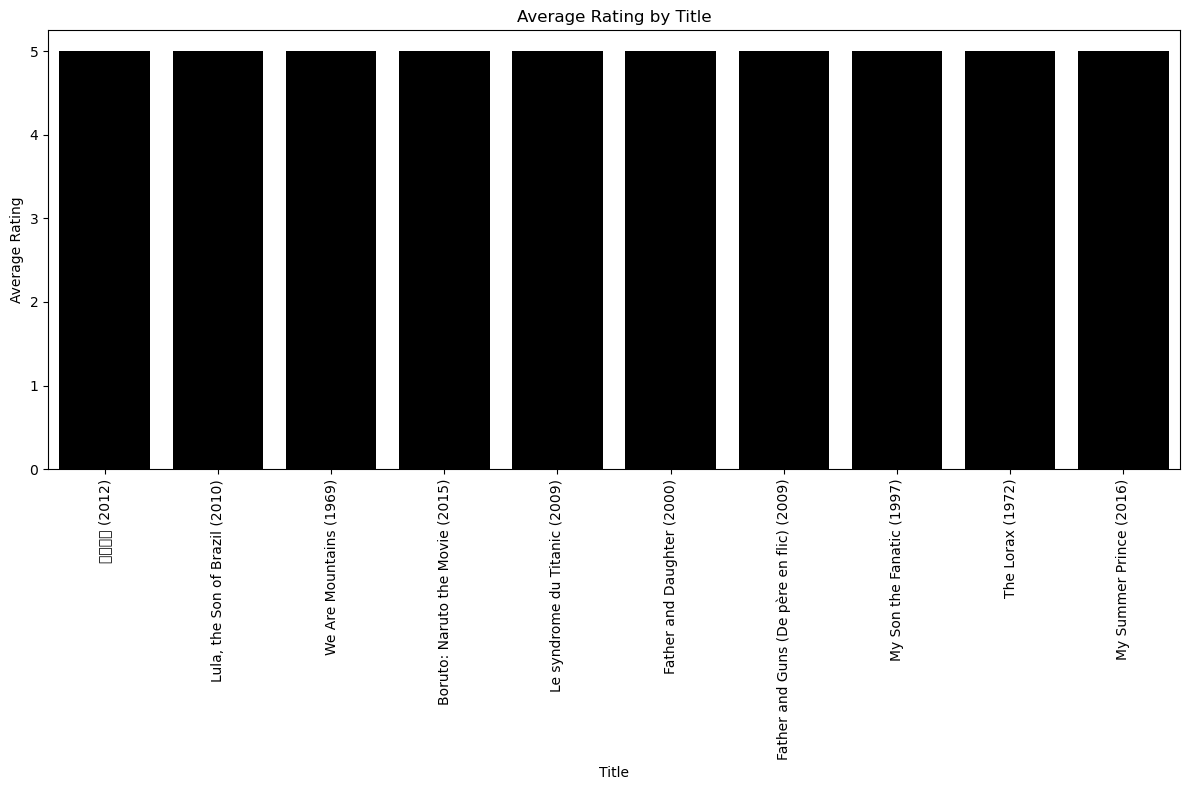

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(data=title_avg_rating_df, x='title', y='rating', color='black')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Average Rating')
plt.title('Average Rating by Title')
plt.tight_layout()
plt.show()

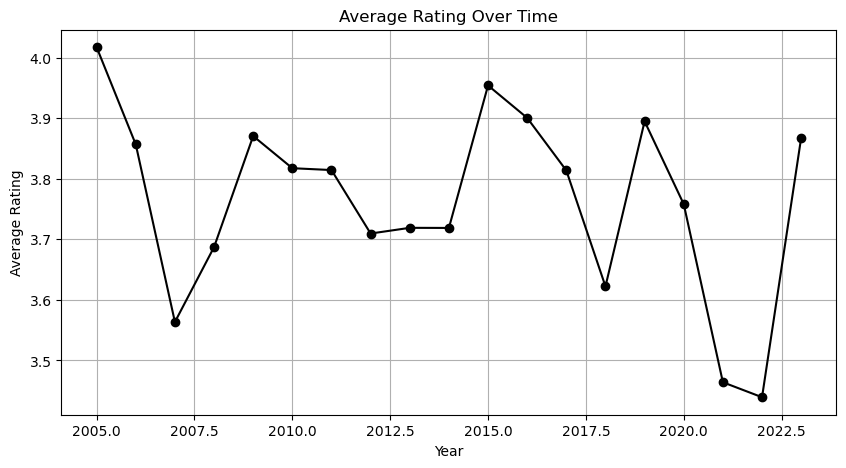

In [43]:
df['year'] = df['timestamp_x'].dt.year
avg_rating_per_year = df.groupby('year')['rating'].mean()

plt.figure(figsize=(10,5))
avg_rating_per_year.plot(marker='o', linestyle='-', color='black')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [44]:
df['month_year'] = df['timestamp_y'].dt.year
tag_freq_per_year = df.groupby('month_year')['tag'].count()
tag_freq_per_year

month_year
1997        49
1998       616
1999       772
2000      2697
2001      1837
2002      4033
2003      5676
2004      7551
2005      7543
2006     24245
2007     23038
2008     24710
2009     40606
2010     93919
2011     69973
2012     56036
2013     53151
2014     63761
2015    116007
2016    111568
2017    132907
2018    152033
2019    126329
2020    200298
2021    199655
2022    153897
2023     56383
Name: tag, dtype: int64

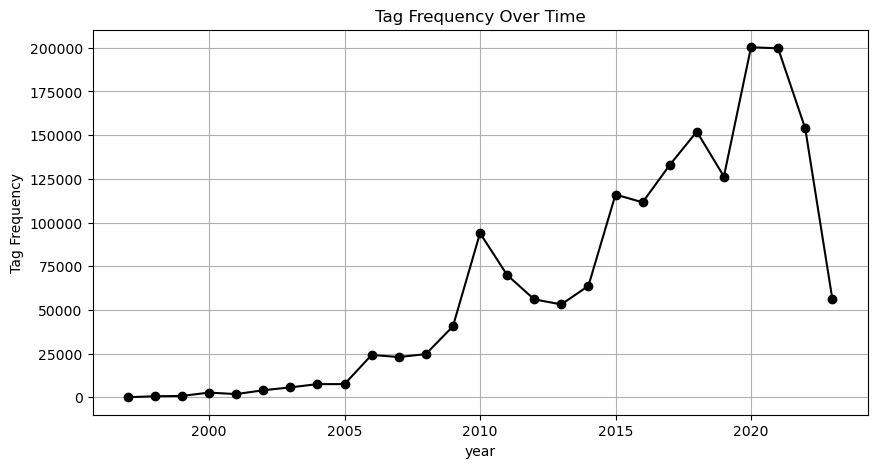

In [45]:
plt.figure(figsize=(10,5))
tag_freq_per_year.plot(marker='o', linestyle='-', color='black')
plt.title('Tag Frequency Over Time')
plt.xlabel('year')
plt.ylabel('Tag Frequency')
plt.grid(True)
plt.show()

In [46]:
movies = ["2001: A Space Odyssey (1968)", 'Pulp Fiction (1994)', "Shawshank Redemption, The (1994)"]
filtered_data = df[df['title'].isin(movies)]

In [47]:
filtered_data

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y,imdbId,tmdbId,year,month_year
48064,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,26,crime,2015-04-18 23:15:19,4.5,2015-04-18 22:59:59,110912,680.0,2015,2015
48065,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,26,cult film,2015-04-18 23:15:19,4.5,2015-04-18 22:59:59,110912,680.0,2015,2015
48066,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,26,quentin tarantino,2015-04-18 23:15:19,4.5,2015-04-18 22:59:59,110912,680.0,2015,2015
48067,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,691,comedy,2022-06-27 20:27:45,5.0,2022-06-27 20:26:58,110912,680.0,2022,2022
48068,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,691,dark comedy,2022-06-27 20:27:15,5.0,2022-06-27 20:26:58,110912,680.0,2022,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
136111,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,329920,technology,2019-09-12 22:24:58,5.0,2015-10-26 17:18:13,62622,62.0,2019,2015
136112,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,329954,philosophical,2018-06-06 19:56:00,3.5,2016-10-24 19:02:44,62622,62.0,2018,2016
136113,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,329954,sci-fi,2018-06-06 19:55:55,3.5,2016-10-24 19:02:44,62622,62.0,2018,2016
136114,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,329954,space,2018-06-06 19:56:05,3.5,2016-10-24 19:02:44,62622,62.0,2018,2016


In [48]:
filtered_data['year_month'] = pd.to_datetime(filtered_data['timestamp_x'], unit='s').dt.to_period('M')

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_10340\3937191915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year_month'] = pd.to_datetime(filtered_data['timestamp_x'], unit='s').dt.to_period('M')


In [49]:
grouped_data = filtered_data.groupby(['title', 'year_month'])['rating'].mean().reset_index()

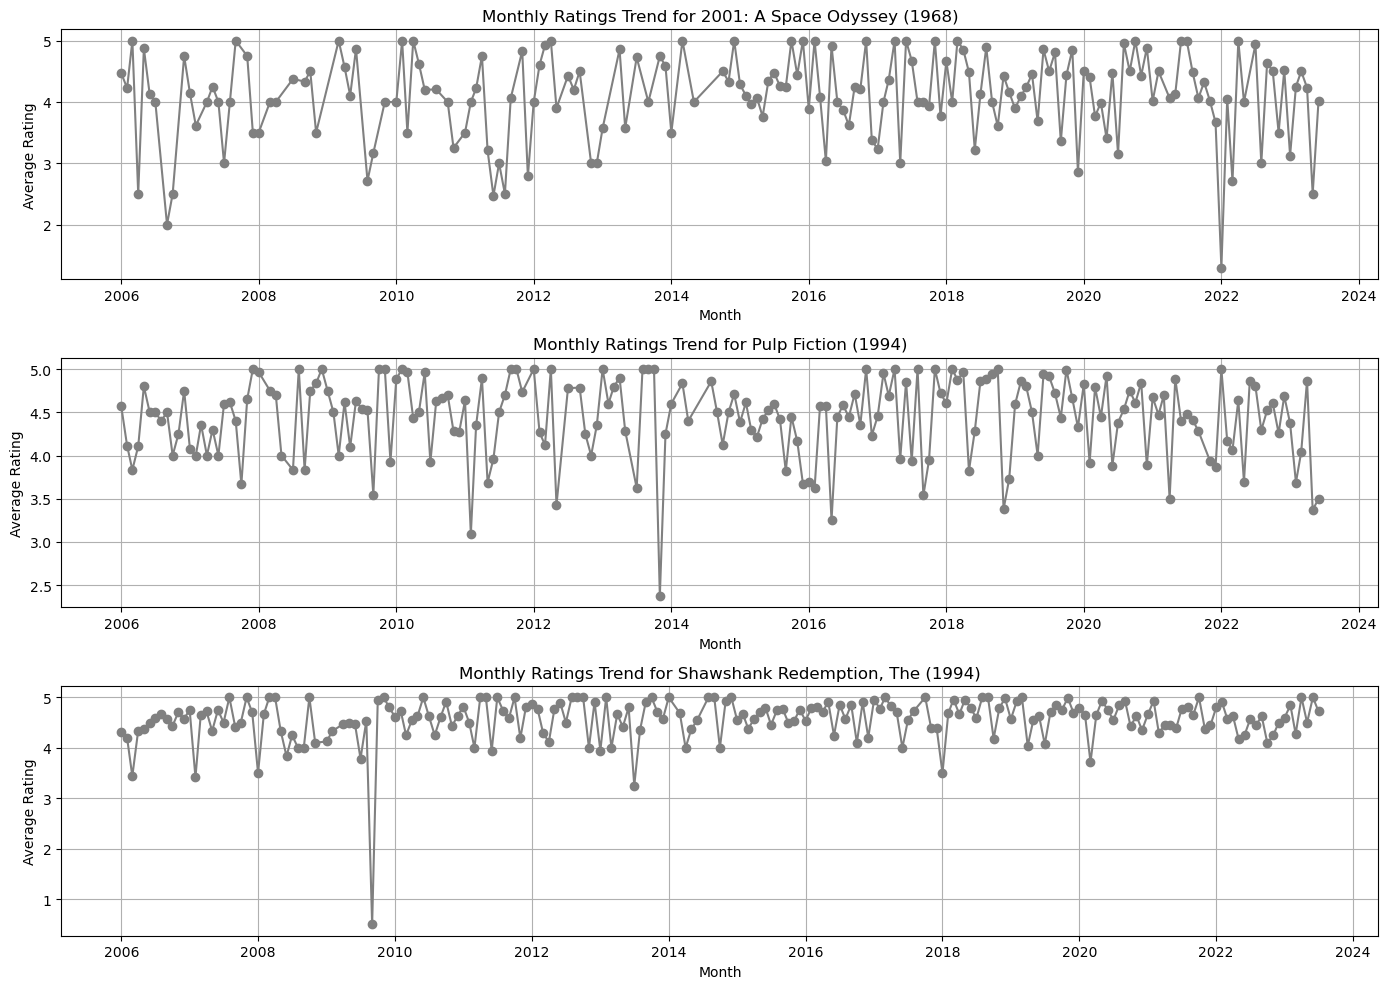

In [50]:
plt.figure(figsize=(14, 10))

for i, movie in enumerate(movies, 1):
    plt.subplot(len(movies), 1, i)
    plt.plot(grouped_data[grouped_data['title'] == movie]['year_month'].dt.to_timestamp(), grouped_data[grouped_data['title'] == movie]['rating'], marker='o',color = 'grey')
    plt.title(f'Monthly Ratings Trend for {movie}')
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.grid(True)

plt.tight_layout()
plt.show()